# 배열의 생성과 변형

In [82]:
import numpy as np
import matplotlib.pyplot as plt

### NumPy의 자료형

In [4]:
x = np.array([1, 2, 3])
x.dtype

dtype('int64')

In [5]:
x = np.array([1.0, 2.0, 3.0])
x.dtype

dtype('float64')

In [6]:
x = np.array([1, 2, 3.0])
x.dtype

dtype('float64')

In [7]:
x = np.array([1, 2, 3], dtype='f')
x.dtype

dtype('float32')

In [8]:
x[0] + x[1]

3.0

In [9]:
x = np.array([1, 2, 3], dtype='U')
x.dtype

dtype('<U1')

### Inf와 NaN

In [10]:
np.array([0, 1, -1, 0]) / np.array([1, 0, 0, 0])

/Users/gimjimin/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in divide
  """Entry point for launching an IPython kernel.


array([0, 0, 0, 0])

In [11]:
np.log(0)

/Users/gimjimin/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf

In [12]:
np.exp(-np.inf)

0.0

### 배열 생성

* 크기가 정해져 있고 모든 값이 0인 배열을 생성하려면 zeros 명령을 사용한다. 인수로는 배열을 크기를 뜻하는 정수를 넣는다.

In [13]:
a = np.zeros(5) 
a

array([0., 0., 0., 0., 0.])

* 크기를 뜻하는 튜플을 입력하면 다차원 배열도 만들 수 있다.



In [14]:
b = np.zeros((2, 3))
b

array([[0., 0., 0.],
       [0., 0., 0.]])

* array 명령과 마찬가지로 dtype 인수를 명시하면 해당 자료형 원소를 가진 배열을 만든다.



In [15]:
c = np.zeros((5, 2), dtype="i")
c

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int32)

* 문자열 배열도 가능하지면 모든 원소의 문자열 크기가 같아야 한다. 만약 더 큰 크기의 문자열을 할당하면 잘릴 수 있다.



In [16]:
d = np.zeros(5, dtype="U4")
d

array([u'', u'', u'', u'', u''], dtype='<U4')

In [17]:
d[0] = "abc"
d[1] = "abcd"
d[2] = "ABCDE"
d

array([u'abc', u'abcd', u'ABCD', u'', u''], dtype='<U4')

* 0이 아닌 1로 초기화된 배열을 생성하려면 ones 명령을 사용한다.



In [18]:
e = np.ones((2, 3, 4), dtype="i8")
e

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]])

* 만약 크기를 튜플로 명시하지 않고 다른 배열과 같은 크기의 배열을 생성하고 싶다면 ones_like, zeros_like 명령을 사용한다.



In [19]:
f = np.ones_like(b, dtype="f")
f

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

* 배열의 크기가 커지면 배열을 초기화하는데도 시간이 걸린다. 이 시간을 단축하려면 배열을 생성만 하고 특정한 값으로 초기화를 하지 않는 empty 명령을 사용할 수 있다. empty 명령으로 생성된 배열에는 기존에 메모리에 저장되어 있던 값이 있으므로 배열의 원소의 값을 미리 알 수 없다.

In [20]:
g = np.empty((4, 3))
g

array([[-2.68156159e+154, -2.68156159e+154,  2.27123101e-314],
       [ 2.27132781e-314,  2.27126939e-314,  2.27132671e-314],
       [ 0.00000000e+000,  0.00000000e+000,  2.24986989e-314],
       [ 0.00000000e+000, -2.68156159e+154, -2.68156159e+154]])

* arange 명령은 NumPy 버전의 range 명령이라고 볼 수 있다. 특정한 규칙에 따라 증가하는 수열을 만든다.



In [21]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [22]:
np.arange(3, 21, 2)

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19])

* linspace 명령이나 logspace 명령은 선형 구간 혹은 로그 구간을 지정한 구간의 수만큼 분할한다.



In [26]:
np.linspace(0, 100, 5) 

array([  0.,  25.,  50.,  75., 100.])

### 전치 연산

* 2차원 배열의 전치(transpose) 연산은 행과 열을 바꾸는 작업이다. 이는 배열의 T 속성으로 구할 수 있다. 메서드가 아닌 속성이라는 점에 유의 한다.

In [27]:
A = np.array([[1, 2, 3], [4, 5, 6]])
A

array([[1, 2, 3],
       [4, 5, 6]])

In [28]:
A.T

array([[1, 4],
       [2, 5],
       [3, 6]])

### 배열의 크기 변형


* 일단 만들어진 배열의 내부 데이터는 보존한 채로 형태만 바꾸려면 reshape 명령이나 메서드를 사용한다. 예를 들어 12개의 원소를 가진 1차원 행렬은 3x4 형태의 2차원 행렬로 만들 수 있다.

In [29]:
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [30]:
b = a.reshape(3, 4)
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

* 사용하는 원소의 갯수가 정해저 있기 때문에 reshape 명령의 형태 튜플의 원소 중 하나는 -1이라는 숫자로 대체할 수 있다. -1을 넣으면 해당 숫자는 다를 값에서 계산되어 사용된다.

In [34]:
a.reshape(3, -1)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [33]:
a.reshape(2, 2, -1)

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])

In [35]:
a.reshape(2, -1, 2)

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]]])

* 다차원 배열을 무조건 1차원으로 펼치기 위해서는 flatten 명령이나 메서드를 사용한다.



In [36]:
a.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

* 배열 사용에서 주의할 점은 길이가 5인 1차원 배열과 행, 열의 갯수가 (5,1)인 2차원 배열 또는 행, 열의 갯수가 (1, 5)인 2차원 배열은 데이터가 같아도 엄연히 다른 객체라는 점이다.

In [37]:
x = np.arange(5)
x

array([0, 1, 2, 3, 4])

In [40]:
x.reshape(1, 5)

array([[0, 1, 2, 3, 4]])

In [39]:
x.reshape(5, 1)

array([[0],
       [1],
       [2],
       [3],
       [4]])

* 이렇게 같은 배열에 대해 차원만 1차원 증가시키는 경우에는 newaxis 명령을 사용하기도 한다.

In [41]:
x[:, np.newaxis]

array([[0],
       [1],
       [2],
       [3],
       [4]])

### 배열 연결

* hstack 명령은 행의 수가 같은 두 개 이상의 배열을 옆으로 연결하여 열의 수가 더 많은 배열을 만든다. 연결할 배열은 하나의 리스트에 담아야 한다.



In [45]:
a1 = np.ones((2,3))
a1

array([[1., 1., 1.],
       [1., 1., 1.]])

In [46]:
a2 = np.zeros((2, 2))
a2

array([[0., 0.],
       [0., 0.]])

In [47]:
np.hstack([a1, a2])


array([[1., 1., 1., 0., 0.],
       [1., 1., 1., 0., 0.]])

* vstack 명령은 열의 수가 같은 두 개 이상의 배열을 위아래로 연결하여 행의 수가 더 많은 배열을 만든다. 연결할 배열은 마찬가지로 하나의 리스트에 담아야 한다.

In [48]:
b1 = np.ones((2, 3))
b1

array([[1., 1., 1.],
       [1., 1., 1.]])

In [49]:
b2 = np.zeros((3, 3))
b2

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [51]:
np.vstack([b1, b2])

array([[1., 1., 1.],
       [1., 1., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

* dstack 명령은 제3의 축 즉, 행이나 열이 아닌 깊이(depth) 방향으로 배열을 합친다. 가장 안쪽의 원소의 차원이 증가한다. 즉 가장 내부의 숫자 원소가 배열이 된다. 

In [52]:
c1 = np.ones((3, 4))
c1

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [53]:
c2 = np.zeros((3, 4))
c2

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [54]:
np.dstack([c1, c2])

array([[[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]]])

In [56]:
(np.dstack([c1, c2])).shape

(3, 4, 2)

* stack 명령은 dstack의 기능을 확장한 것으로 dstack처럼 마지막 차원으로 연결하는 것이 아니라 사용자가 지정한 차원(축으로) 배열을 연결한다. axis 인수(디폴트 0)를 사용하여 연결후의 회전 방향을 정한다. 디폴트 인수값은 0이고 가장 앞쪽에 차원이 생성된다. 즉, 배열 두 개가 겹치게 되므로 연결하고자 하는 배열들의 크기가 모두 같아야 한다.

In [57]:
c = np.stack([c1, c2])
c

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [59]:
c.shape

(2, 3, 4)

In [61]:
c = np.stack([c1, c2], axis=1)
c

array([[[1., 1., 1., 1.],
        [0., 0., 0., 0.]],

       [[1., 1., 1., 1.],
        [0., 0., 0., 0.]],

       [[1., 1., 1., 1.],
        [0., 0., 0., 0.]]])

* r_ 메서드는 hstack 명령과 비슷하게 배열을 좌우로 연결한다. 다만 메서드임에도 불구하고 소괄호(parenthesis, ())를 사용하지 않고 인덱싱과 같이 대괄호(bracket, [])를 사용한다. 이런 특수 메서드를 인덱서(indexer)라고 한다.

In [63]:
np.r_[np.array([1, 2, 3]), np.array([4,5,6])]

array([1, 2, 3, 4, 5, 6])

* c_ 메서드는 배열의 차원을 증가시킨 후 좌우로 연결한다. 만약 1차원 배열을 연결하면 2차원 배열이 된다.

In [65]:
np.c_[np.array([1, 2, 3]), np.array([4,5,6])]

array([[1, 4],
       [2, 5],
       [3, 6]])

* tile 명령은 동일한 배열을 반복하여 연결한다.

In [66]:
a = np.array([[0, 1, 2], [3, 4, 5]])
np.tile(a, 2)

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5]])

In [70]:
np.tile(a, (3, 2))

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5]])

### 2차원 그리드 포인트 생성

* meshgrid 명령은 사각형 영역을 구성하는 가로축의 점들과 세로축의 점을 나타내는 두 벡터를 인수로 받아서 이 사각형 영역을 이루는 조합을 출력한다. 결과는 그리드 포인트의 x 값만을 표시하는 행렬과 y 값만을 표시하는 행렬 두 개로 분리하여 출력한다.

In [71]:
x = np.arange(3)
x

array([0, 1, 2])

In [72]:
y = np.arange(5)
y

array([0, 1, 2, 3, 4])

In [74]:
X, Y = np.meshgrid(x, y)

In [76]:
X

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

In [77]:
Y

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

In [79]:
[list(zip(x, y)) for x, y in zip(X, Y)]

[[(0, 0), (1, 0), (2, 0)],
 [(0, 1), (1, 1), (2, 1)],
 [(0, 2), (1, 2), (2, 2)],
 [(0, 3), (1, 3), (2, 3)],
 [(0, 4), (1, 4), (2, 4)]]

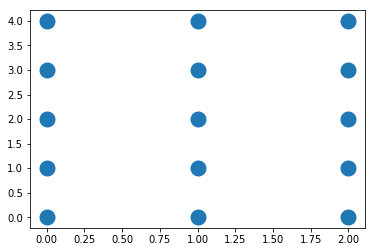

In [83]:
plt.scatter(X, Y, linewidths=10)
plt.show()